

# Project: Investigate a Dataset - [u.s.-census-data.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Census data is a dataset that contain columns which represent facts and states
> Facts : this columns conatin information related (population, land area , total employment ,payrols ,and many others)
> states as multiple columns representing the value of the fact per state

### Question(s) for Analysis
#### Q3 from the previous notebook which is "what are the factors that seem to relate to gun possession? "

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling


In [3]:
census_df=pd.read_csv('u.s.-census-data.csv')
census_df.head(2)

,Fact,aaaa,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


#### 1-drop an abnormal column "aaaa" 

In [4]:
census_df.drop(columns='aaaa' , inplace= True)

#### 2- renaming Fact columns into state to be able to transpose the data frame

In [5]:
census_df.rename(columns={'Fact':'state'},inplace= True)

In [6]:
census_df.head(2)

,state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


#### 3-converting rows into columns and vice versa a necessary step for merging with a previos data 

In [7]:
census_df=census_df.T


In [8]:
census_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July...","American Indian and Alaska Native alone, perce...","Asian alone, percent, July 1, 2016, (V2016)",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent, July 1, 2016, (V2...","Hispanic or Latino, percent, July 1, 2016, (V...","White alone, not Hispanic or Latino, percent, ...","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, ...",Median selected monthly owner costs -with a mo...,Median selected monthly owner costs -without a...,"Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of pe...","Language other than English spoken at home, pe...","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...","With a disability, under age 65 years, percent...","Persons without health insurance, under age 6...","In civilian labor force, total, percent of pop...","In civilian labor force, female, percent of po...","Total accommodation and food services sales, 2...",Total health care and social assistance receip...,"Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers ag...","Median household income (in 2015 dollars), 201...",Per capita income in past 12 months (in 2015 d...,"Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""


#### 4-it seems like there is a problem regarding header and columns this problem will be fixed as follow

In [9]:
new_header = census_df.iloc[0] #grab the first row for the header
census_df= census_df[1:] #take the data less the header row
census_df.columns = new_header #set the header row as the df header

In [10]:
census_df.head(2)

state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,146","1,503

In [11]:
census_df.reset_index(inplace= True)

In [12]:
census_df.head(2)

state,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,1

In [13]:
census_df.rename(columns={'index':'state'},index={'state':'index'},inplace= True)

In [14]:
census_df.head(2)

state,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,1

#### 5-mergind census data with totalpermit_state.csv

In [16]:
#load totalpermit_stat.csv
totalpermit_state=pd.read_csv('totalpermit_state.csv')
totalpermit_state.head()

,state,permit
0,Kentucky,32533977.0
1,Illinois,13670251.0
2,California,8261028.0
3,North Carolina,5691209.0
4,Texas,4757312.0


In [17]:
merged_df=pd.merge(totalpermit_state,census_df,on = 'state' ,how = 'outer')
merged_df.head(2)

,state,permit,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Kentucky,32533977.0,"4,436,974","4,339,344",2.20%,"4,339,367",6.20%,6.50%,22.80%,23.60%,15.60%,13.30%,50.70%,50.80%,88.00%,8.30%,0.30%,1.50%,0.10%,1.90%,3.50%,85.00%,"297,312",3.40%,"1,965,556","1,927,164",67.20%,"$123,200","$1,112",$339,$675,"12,714","1,708,499",2.5,84.70%,5.10%,84.20%,22.30%,12.90%,6.00%,59.10%,54.90%,"7,500,115","26,264,745","129,284,438","71,745,899","54,869,978","$12,526",23,"$43,740","$24,063",18.50%,"91,845","1,579,477","63,741,066",2.90%,"280,835","331,546","184,154","106,011","27,258","296,155","33,208","282,704",109.9,"39,486.34","""21"""
1,Illinois,13670251.0,"12,801,539","12,831,574",-0.20%,"12,830,632",6.00%,6.50%,22.90%,24.40%,14.60%,12.50%,50.90%,51.00%,77.20%,14.70%,0.60%,5.50%,0.10%,1.90%,17.00%,61.70%,"668,933",14.00%,"5,326,970","5,296,7


### Data Cleaning

 

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 67 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   state                                                                                   55 non-null     object 
 1   permit                                                                                  55 non-null     float64
 2   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object 
 3   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object 
 4   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object 
 5   Population, Census, April 1, 2010                                        

In [18]:
merged_df.isna().sum()

state                                                                                    0
permit                                                                                   0
Population estimates, July 1, 2016,  (V2016)                                             5
Population estimates base, April 1, 2010,  (V2016)                                       5
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    5
                                                                                        ..
Veteran-owned firms, 2012                                                                5
Nonveteran-owned firms, 2012                                                             5
Population per square mile, 2010                                                         5
Land area in square miles, 2010                                                          5
FIPS Code                                                                                5

#### 1-dropping nan values

In [19]:
merged_df.dropna(inplace = True)

#### 2-Cleaning column labels

In [20]:
merged_df.columns

Index(['state', 'permit', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, 

In [24]:
merged_df.columns=merged_df.columns.str.lower().str.replace(' ','_')
merged_df.columns=merged_df.columns.str.replace(')','')
merged_df.columns=merged_df.columns.str.replace('(','')
merged_df.columns=merged_df.columns.str.replace('-','')
merged_df.columns=merged_df.columns.str.replace('__','_')
merged_df.columns=merged_df.columns.str.replace(',','')

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6904/3210812495.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df.columns=merged_df.columns.str.replace(')','')
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6904/3210812495.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df.columns=merged_df.columns.str.replace('(','')


In [25]:
merged_df.columns

Index(['state', 'permit', 'population_estimates_july_1_2016_v2016',
       'population_estimates_base_april_1_2010_v2016',
       'population_percent_change_april_1_2010_estimates_base_to_july_1_2016_v2016',
       'population_census_april_1_2010',
       'persons_under_5_years_percent_july_1_2016_v2016',
       'persons_under_5_years_percent_april_1_2010',
       'persons_under_18_years_percent_july_1_2016_v2016',
       'persons_under_18_years_percent_april_1_2010',
       'persons_65_years_and_over_percent_july_1_2016_v2016',
       'persons_65_years_and_over_percent_april_1_2010',
       'female_persons_percent_july_1_2016_v2016',
       'female_persons_percent_april_1_2010',
       'white_alone_percent_july_1_2016_v2016',
       'black_or_african_american_alone_percent_july_1_2016_v2016',
       'american_indian_and_alaska_native_alone_percent_july_1_2016_v2016',
       'asian_alone_percent_july_1_2016_v2016',
       'native_hawaiian_and_other_pacific_islander_alone_percent_july_1

#### 3 - slicing necessary columns for my analysis sample

In [26]:
merged_df=merged_df[['state', 'permit', 'population_estimates_july_1_2016_v2016','persons_without_health_insurance_under_age_65_years_percent','total_employment_2015','persons_in_poverty_percent']]

In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   state                                                        50 non-null     object 
 1   permit                                                       50 non-null     float64
 2   population_estimates_july_1_2016_v2016                       50 non-null     object 
 3   persons_without_health_insurance_under_age_65_years_percent  50 non-null     object 
 4   total_employment_2015                                        50 non-null     object 
 5   persons_in_poverty_percent                                   50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.7+ KB


In [28]:
merged_df.head(5)

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
0,Kentucky,32533977.0,"4,436,974",6.00%,"1,579,477",18.50%
1,Illinois,13670251.0,"12,801,539",7.40%,"5,427,549",13.00%
2,California,8261028.0,"39,250,017",8.30%,"14,325,377",14.30%
3,North Carolina,5691209.0,10146788,0.122,3670284,0.154
4,Texas,4757312.0,"27,862,596",18.60%,"10,239,710",15.60%


#### 4-removing commas from data

In [29]:
merged_df.head()

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
0,Kentucky,32533977.0,"4,436,974",6.00%,"1,579,477",18.50%
1,Illinois,13670251.0,"12,801,539",7.40%,"5,427,549",13.00%
2,California,8261028.0,"39,250,017",8.30%,"14,325,377",14.30%
3,North Carolina,5691209.0,10146788,0.122,3670284,0.154
4,Texas,4757312.0,"27,862,596",18.60%,"10,239,710",15.60%


In [30]:
merged_df['population_estimates_july_1_2016_v2016']=merged_df['population_estimates_july_1_2016_v2016'].apply(lambda x:x.replace(',',''))

In [31]:
merged_df['total_employment_2015']=merged_df['total_employment_2015'].apply(lambda x:x.replace(',',''))

In [32]:
merged_df.head()

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
0,Kentucky,32533977.0,4436974,6.00%,1579477,18.50%
1,Illinois,13670251.0,12801539,7.40%,5427549,13.00%
2,California,8261028.0,39250017,8.30%,14325377,14.30%
3,North Carolina,5691209.0,10146788,0.122,3670284,0.154
4,Texas,4757312.0,27862596,18.60%,10239710,15.60%


In [33]:
merged_df.head()

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
0,Kentucky,32533977.0,4436974,6.00%,1579477,18.50%
1,Illinois,13670251.0,12801539,7.40%,5427549,13.00%
2,California,8261028.0,39250017,8.30%,14325377,14.30%
3,North Carolina,5691209.0,10146788,0.122,3670284,0.154
4,Texas,4757312.0,27862596,18.60%,10239710,15.60%


#### 5-Fixing some data types

In [34]:
for i in merged_df['persons_without_health_insurance_under_age_65_years_percent']:
    if '%'not in i:
        merged_df['persons_without_health_insurance_under_age_65_years_percent'] = merged_df['persons_without_health_insurance_under_age_65_years_percent'].replace([i],str(float(i)*100))
        

In [35]:
merged_df.head()

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
0,Kentucky,32533977.0,4436974,6.00%,1579477,18.50%
1,Illinois,13670251.0,12801539,7.40%,5427549,13.00%
2,California,8261028.0,39250017,8.30%,14325377,14.30%
3,North Carolina,5691209.0,10146788,12.2,3670284,0.154
4,Texas,4757312.0,27862596,18.60%,10239710,15.60%


In [36]:
for i in merged_df['persons_in_poverty_percent']:
    if '%'not in i:
        merged_df['persons_in_poverty_percent'] = merged_df['persons_in_poverty_percent'].replace([i],str(float(i)*100))
        

In [37]:
merged_df.head()

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
0,Kentucky,32533977.0,4436974,6.00%,1579477,18.50%
1,Illinois,13670251.0,12801539,7.40%,5427549,13.00%
2,California,8261028.0,39250017,8.30%,14325377,14.30%
3,North Carolina,5691209.0,10146788,12.2,3670284,15.4
4,Texas,4757312.0,27862596,18.60%,10239710,15.60%


In [38]:
merged_df['population_estimates_july_1_2016_v2016']=merged_df['population_estimates_july_1_2016_v2016'].str.extract('(\d+)').astype(int)
merged_df['total_employment_2015']=merged_df['total_employment_2015'].str.extract('(\d+)').astype(int)

In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   state                                                        50 non-null     object 
 1   permit                                                       50 non-null     float64
 2   population_estimates_july_1_2016_v2016                       50 non-null     int32  
 3   persons_without_health_insurance_under_age_65_years_percent  50 non-null     object 
 4   total_employment_2015                                        50 non-null     int32  
 5   persons_in_poverty_percent                                   50 non-null     object 
dtypes: float64(1), int32(2), object(3)
memory usage: 2.3+ KB


In [40]:
merged_df['persons_in_poverty_percent']= merged_df['persons_in_poverty_percent'].apply(lambda x: x.replace('%',''))
merged_df['persons_without_health_insurance_under_age_65_years_percent']= merged_df['persons_without_health_insurance_under_age_65_years_percent'].apply(lambda x: x.replace('%',''))


In [41]:
merged_df['persons_in_poverty_percent']= merged_df['persons_in_poverty_percent'].str.extract('(\d+)').astype(float)
merged_df['persons_without_health_insurance_under_age_65_years_percent']= merged_df['persons_without_health_insurance_under_age_65_years_percent'].str.extract('(\d+)').astype(float)

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   state                                                        50 non-null     object 
 1   permit                                                       50 non-null     float64
 2   population_estimates_july_1_2016_v2016                       50 non-null     int32  
 3   persons_without_health_insurance_under_age_65_years_percent  50 non-null     float64
 4   total_employment_2015                                        50 non-null     int32  
 5   persons_in_poverty_percent                                   50 non-null     float64
dtypes: float64(3), int32(2), object(1)
memory usage: 2.3+ KB


In [43]:
merged_df.head()

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
0,Kentucky,32533977.0,4436974,6.0,1579477,18.0
1,Illinois,13670251.0,12801539,7.0,5427549,13.0
2,California,8261028.0,39250017,8.0,14325377,14.0
3,North Carolina,5691209.0,10146788,12.0,3670284,15.0
4,Texas,4757312.0,27862596,18.0,10239710,15.0


<a id='eda'></a>
## Exploratory Data Analysis




In [44]:
merged_df.sort_values('persons_in_poverty_percent',ascending = False).head()

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
42,South Dakota,82274.0,865454,10.0,353540,1330.0
31,Oregon,353866.0,4093465,7.0,1498727,1330.0
37,Louisiana,216895.0,4681666,11.0,1724973,20.0
36,Mississippi,220014.0,2988726,13.0,926391,20.0
38,New Mexico,140719.0,2081015,10.0,626284,19.0


#### correction of some values 


In [45]:
merged_df.iloc[42,-1] = 13.3

In [46]:
merged_df.iloc[31,-1] = 13.3

In [47]:
merged_df['persons_in_poverty_percent'].value_counts()

11.0    9
14.0    7
15.0    5
9.0     5
10.0    4
12.0    4
13.0    3
16.0    3
17.0    3
13.3    2
20.0    2
18.0    1
7.0     1
19.0    1
Name: persons_in_poverty_percent, dtype: int64

In [48]:
merged_df.sort_values('persons_in_poverty_percent',ascending = False).head()

,state,permit,population_estimates_july_1_2016_v2016,persons_without_health_insurance_under_age_65_years_percent,total_employment_2015,persons_in_poverty_percent
36,Mississippi,220014.0,2988726,13.0,926391,20.0
37,Louisiana,216895.0,4681666,11.0,1724973,20.0
38,New Mexico,140719.0,2081015,10.0,626284,19.0
0,Kentucky,32533977.0,4436974,6.0,1579477,18.0
26,Arkansas,709855.0,2988248,9.0,1003113,17.0



# Research Question what factors seems to correlate to number of gun permits?

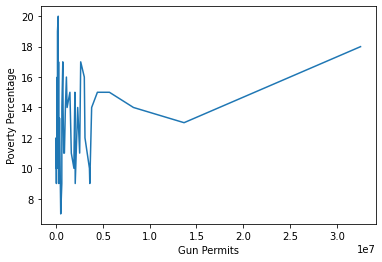

In [49]:
plt.plot(merged_df['permit'],merged_df['persons_in_poverty_percent'])
plt.xlabel('Gun Permits')
plt.ylabel('Poverty Percentage');

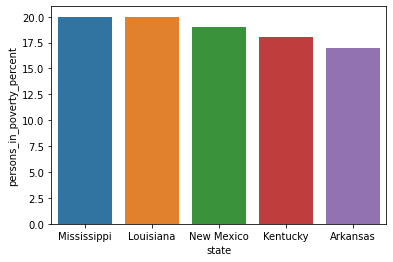

In [61]:
sns.barplot(x='state',y='persons_in_poverty_percent',data= merged_df.sort_values('persons_in_poverty_percent',ascending=False).head());

## we can see in the two visualization above this cell that the only state in top permits that has really high poverty percent is Kentucky and a negative correlation between poverty percent in general and gun permits

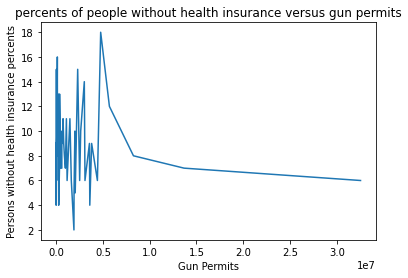

In [56]:
plt.plot(merged_df['permit'],merged_df['persons_without_health_insurance_under_age_65_years_percent'])
plt.xlabel('Gun Permits')
plt.ylabel('Persons without health insurance percents')
plt.title('percents of people without health insurance versus gun permits');

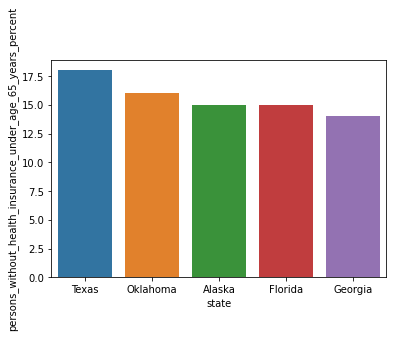

In [62]:
sns.barplot(x='state',y='persons_without_health_insurance_under_age_65_years_percent',data= merged_df.sort_values('persons_without_health_insurance_under_age_65_years_percent',ascending=False).head());

## we can see in the two visualization above this cell that the only state in top permits that has really high percentage of people without health isurance is Texas and a negative correlation between persons wthout insurance percent in general and gun permits

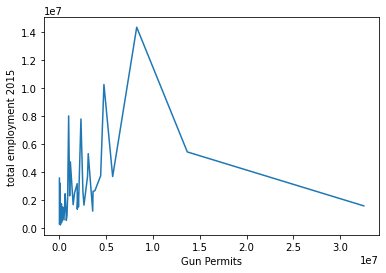

In [51]:
plt.plot(merged_df['permit'],merged_df['total_employment_2015'])
plt.xlabel('Gun Permits')
plt.ylabel('total employment 2015');

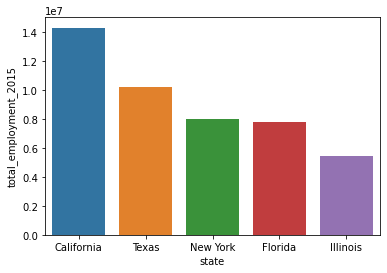

In [63]:
sns.barplot(x='state',y='total_employment_2015',data= merged_df.sort_values('total_employment_2015',ascending=False).head());

## As we can see in the two visualizations above the first one show a postive correlation between empoyment and gun permits and in the second one we can see that 3 out of 5 top states in employment numbers are states with high permits '' from the top 5 states with gun permits'' (California,Texas,Illinois)

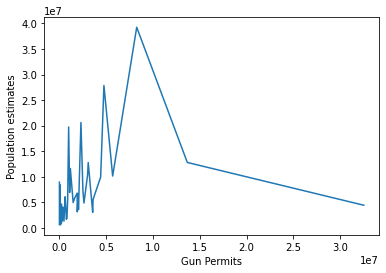

In [52]:
plt.plot(merged_df['permit'],merged_df['population_estimates_july_1_2016_v2016'])
plt.xlabel('Gun Permits')
plt.ylabel('Population estimates');

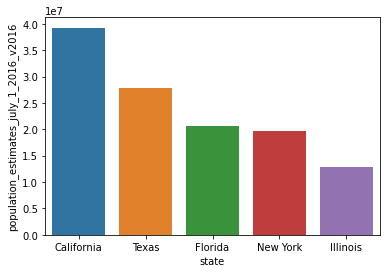

In [64]:
sns.barplot(x='state',y='population_estimates_july_1_2016_v2016',data= merged_df.sort_values('population_estimates_july_1_2016_v2016',ascending=False).head());

## As we can see in the two visualizations above the first one show a postive correlation between population estimates and gun permits and in the second one we can see that 3 out of 5 top states in population estimates are states with high permits '' from the top 5 states with gun permits'' (California,Texas,Illinois)

### It is apparant that gun permits are  negatively correlated to both 1- persons in poverty percents 2 -persons without health insurance below 65 yrs old
### Also there are postive correlation to both 1- total employment 2-population estimates

<a id='conclusions'></a>
## Conclusions

> It is apparant that gun permits are  negatively correlated to both
>>1- persons in poverty percents 

>>2 -persons without health insurance below 65 yrs old.

> Also there are postive correlation to both
>> 1- total employment 

>>2-population estimates
 

> Limitation 
>>1-Census data that i used is not updated to 2022

>>2-there are outlier in which some states has both high poverty and very high permits like Kentucky




In [129]:
merged_df.to_csv('mergedv2.csv',index=False)